# $$\color{Brown}{\text{Movie_Income_Prediction}}$$

## Problem Statement
> The objective of this study is to develop a predictive model that estimates the revenue of movies based on a comprehensive set of features, including factors such as popularity, runtime, budget, release month, release year, genres, original language, production companies, production countries, released languages, movie status, title, cast, and director name. The aim is to create a reliable and accurate tool that can assist movie studios, producers, and investors in forecasting the financial success of a movie before its release. By analyzing these various attributes, the model will provide insights into the potential revenue a movie may generate, enabling stakeholders to make informed decisions regarding budget allocation, marketing strategies, and overall investment viability. Ultimately, this predictive model will contribute to optimizing decision-making processes within the film industry and maximizing profitability.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1= pd.read_csv(r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML Project 2\train.csv")

In [3]:
df1.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

## Discription about columns
- 'belongs_to_collection': Indicates the movie's association with a specific collection or series of films.
- 'budget': The estimated or actual cost of producing the movie.
- 'genres': The categorization of the movie based on its theme or content, such as action, comedy, or drama.
- 'homepage': The official website of the movie, if available.
- 'imdb_id': The unique identifier assigned to the movie on the IMDb (Internet Movie Database) website.
- 'original_language': The language in which the movie was originally produced.
- 'original_title': The title of the movie in its original language.
- 'overview': A brief summary or synopsis providing an overview of the movie's plot or premise.
- 'popularity': A metric that indicates the relative popularity or buzz surrounding the movie.
- 'poster_path': The file path or URL to the movie's poster image.
- 'production_companies': The companies or studios involved in the production of the movie.
- 'production_countries': The countries where the movie was primarily produced.
- 'release_date': The date when the movie was released in theaters or made available to the public.
- 'runtime': The duration or length of the movie in minutes.
- 'spoken_languages': The languages spoken in the movie, other than the original language.
- 'status': Indicates the current status of the movie, such as "Released" or "In Production."
- 'tagline': A catchy phrase or slogan associated with the movie, often used in promotional materials.
- 'title': The title of the movie in the language of the user or viewer.
- 'Keywords': Relevant keywords or terms associated with the movie, often used for categorization or search purposes.
- 'cast': The actors or actresses who appear in the movie and their respective roles.
- 'crew': The individuals involved in the movie's production, such as directors, producers, and cinematographers.
- 'revenue': The total revenue generated by the movie, typically through box office ticket sales or other distribution channels.

In [40]:
df1.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [41]:
from skimpy import skim

In [42]:
skim(df1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3000   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 23     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %   ┃ mean      ┃ sd         ┃ p0     ┃ p25      ┃ p75      ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id            │   0 │      0 │      1500 │        870 │      1 │      750 │     2300 │       3000 │ ██████ │  │
│ │ budget        │   0 │      0 │  23000000 │   37000000 │      0 │        0 │ 29000000 │  380000000 │   █▁   │  │
│ │ popularity    │   0 │      0 │       8.5 │         12 │  1e-06 │        4 │       11 │        290 │   █    │  │
│ │ runtime       │   2 │  0.067 │       110 │         22 │      0 │       94 │      120 │        340 │   █▄   │  │
│ │ revenue       │   0 │      0 │  67000000 │  140000000 │      1 │  2400000 │ 69000000 │ 1500000000 │   █    │  │
│ └───────────────┴─────┴────────┴───────────┴────────────┴────────┴──────────┴──────────┴────────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ belongs_to_collectio                │     2400 │         80 │                     2.1 │               6200 │  │
│ │ genres                              │        7 │       0.23 │                     2.1 │               6200 │  │
│ │ homepage                            │     2100 │         68 │                     2.1 │               6200 │  │
│ │ imdb_id                             │        0 │          0 │                     2.1 │               6200 │  │
│ │ original_language                   │        0 │          0 │                     2.1 │               6200 │  │
│ │ original_title                      │        0 │          0 │                     2.1 │               6200 │  │
│ │ overview                            │        8 │       0.27 │                     2.1 │               6200 │  │
│ │ poster_path                         │        1 │      0.033 │                     2.1 │               6200 │  │
│ │ production_companies                │      160 │        5.2 │                     2.1 │               6200 │  │
│ │ production_countries                │       55 │        1.8 │                     2.1 │               6200 │  │
│ │ release_date                        │        0 │          0 │                     2.1 │               6200 │  │
│ │ spoken_languages                    │       20 │    

In [43]:
df1["budget"].value_counts()

0           812
15000000     72
40000000     71
25000000     71
5000000      68
           ... 
747000        1
1119000       1
65000         1
1750000       1
1135654       1
Name: budget, Length: 406, dtype: int64

## Data Manupulation

In [44]:
df1["budget_Millions"]=df1["budget"].apply(lambda x : x/1000000 if x>0 else x)
df1["revenue_Millions"]=df1["revenue"].apply(lambda x : x/1000000 if x>0 else x)

In [49]:
df1['genres'] = df1['genres'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)
df1['production_companies'] = df1['production_companies'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)
df1['production_countries'] = df1['production_countries'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)
df1['Keywords'] = df1['Keywords'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)

In [50]:
df1.head()

,id,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,budget_Millions,revenue_Millions
0,1,[Comedy],en,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",14.0,12.314651
1,2,"[Comedy, Drama, Family, Romance]",en,8.248895,[Walt Disney Pictures],[United States of America],8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",40.0,95.149435
2,3,[Drama],en,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",3.3,13.092000
3,4,"[Thriller, Drama]",hi,3.174936,NaN,[India],3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[mystery, bollywood, police corruption, crime,...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1.2,16.000000
4,5,"[Action, Thriller]",ko,1.148070,NaN,[South Korea],2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0.0,3.923970


In [51]:
df1.production_companies[0]

['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)']

In [52]:
df1.original_language.unique()

array(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
       'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da',
       'fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu',
       'ml', 'bn', 'id'], dtype=object)

In [53]:
df1.spoken_languages

0                [{'iso_639_1': 'en', 'name': 'English'}]
1                [{'iso_639_1': 'en', 'name': 'English'}]
2                [{'iso_639_1': 'en', 'name': 'English'}]
3       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4                [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
                              ...                        
2995             [{'iso_639_1': 'en', 'name': 'English'}]
2996             [{'iso_639_1': 'sv', 'name': 'svenska'}]
2997             [{'iso_639_1': 'en', 'name': 'English'}]
2998             [{'iso_639_1': 'en', 'name': 'English'}]
2999             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 3000, dtype: object

> Based on iso_639_1 decoded the language with respective to its language code from google 

In [54]:
iso_dict = {
    'aa': 'Afar', 'ab': 'Abkhazian', 'ae': 'Avestan', 'af': 'Afrikaans', 'ak': 'Akan', 'am': 'Amharic', 'an': 'Aragonese',
    'ar': 'Arabic', 'as': 'Assamese', 'av': 'Avaric', 'ay': 'Aymara', 'az': 'Azerbaijani', 'ba': 'Bashkir', 'be': 'Belarusian',
    'bg': 'Bulgarian', 'bh': 'Bihari languages', 'bi': 'Bislama', 'bm': 'Bambara', 'bn': 'Bengali', 'bo': 'Tibetan',
    'br': 'Breton', 'bs': 'Bosnian', 'ca': 'Catalan', 'ce': 'Chechen', 'ch': 'Chamorro', 'co': 'Corsican', 'cr': 'Cree',
    'cs': 'Czech', 'cu': 'Church Slavic', 'cv': 'Chuvash', 'cy': 'Welsh', 'da': 'Danish', 'de': 'German', 'dv': 'Divehi',
    'dz': 'Dzongkha', 'ee': 'Ewe', 'el': 'Greek', 'en': 'English', 'eo': 'Esperanto', 'es': 'Spanish', 'et': 'Estonian',
    'eu': 'Basque', 'fa': 'Persian', 'ff': 'Fulah', 'fi': 'Finnish', 'fj': 'Fijian', 'fo': 'Faroese', 'fr': 'French',
    'fy': 'Western Frisian', 'ga': 'Irish', 'gd': 'Scottish Gaelic', 'gl': 'Galician', 'gn': 'Guarani', 'gu': 'Gujarati',
    'gv': 'Manx', 'ha': 'Hausa', 'he': 'Hebrew', 'hi': 'Hindi', 'ho': 'Hiri Motu', 'hr': 'Croatian', 'ht': 'Haitian',
    'hu': 'Hungarian', 'hy': 'Armenian', 'hz': 'Herero', 'ia': 'Interlingua', 'id': 'Indonesian', 'ie': 'Interlingue',
    'ig': 'Igbo', 'ii': 'Sichuan Yi', 'ik': 'Inupiaq', 'io': 'Ido', 'is': 'Icelandic', 'it': 'Italian', 'iu': 'Inuktitut',
    'ja': 'Japanese', 'jv': 'Javanese', 'ka': 'Georgian', 'kg': 'Kongo', 'ki': 'Kikuyu', 'kj': 'Kwanyama', 'kk': 'Kazakh',
    'kl': 'Kalaallisut', 'km': 'Central Khmer', 'kn': 'Kannada', 'ko': 'Korean', 'kr': 'Kanuri', 'ks': 'Kashmiri',
    'ku': 'Kurdish', 'kv': 'Komi', 'kw': 'Cornish', 'ky': 'Kirghiz', 'la': 'Latin', 'lb': 'Luxembourgish', 'lg': 'Ganda',
    'li': 'Limburgan', 'ln': 'Lingala', 'lo': 'Lao', 'lt': 'Lithuanian', 'lu': 'Luba-Katanga', 'lv': 'Latvian', 'mg': 'Malagasy',
    'mh': 'Marshallese', 'mi': 'Maori', 'mk': 'Macedonian', 'ml': 'Malayalam', 'mn': 'Mongolian', 'mr': 'Marathi', 'ms': 'Malay',
    'mt': 'Maltese', 'my': 'Burmese', 'na': 'Nauru', 'nb': 'Norwegian Bokmål', 'nd': 'North Ndebele', 'ne': 'Nepali', 'ng': 'Ndonga',
    'nl': 'Dutch', 'nn': 'Norwegian Nynorsk', 'no': 'Norwegian', 'nr': 'South Ndebele', 'nv': 'Navajo', 'ny': 'Chichewa',
    'oc': 'Occitan', 'oj': 'Ojibwa', 'om': 'Oromo', 'or': 'Oriya', 'os': 'Ossetian', 'pa': 'Panjabi', 'pi': 'Pali', 'pl': 'Polish',
    'ps': 'Pushto', 'pt': 'Portuguese', 'qu': 'Quechua', 'rm': 'Romansh', 'rn': 'Rundi', 'ro': 'Romanian', 'ru': 'Russian',
    'rw': 'Kinyarwanda', 'sa': 'Sanskrit', 'sc': 'Sardinian', 'sd': 'Sindhi', 'se': 'Northern Sami', 'sg': 'Sango', 'si': 'Sinhala',
    'sk': 'Slovak', 'sl': 'Slovenian', 'sm': 'Samoan', 'sn': 'Shona', 'so': 'Somali', 'sq': 'Albanian', 'sr': 'Serbian', 'ss': 'Swati',
    'st': 'Southern Sotho', 'su': 'Sundanese', 'sv': 'Swedish', 'sw': 'Swahili', 'ta': 'Tamil', 'te': 'Telugu', 'tg': 'Tajik',
    'th': 'Thai', 'ti': 'Tigrinya', 'tk': 'Turkmen', 'tl': 'Tagalog', 'tn': 'Tswana', 'to': 'Tonga (Tonga Islands)', 'tr': 'Turkish',
    'ts': 'Tsonga', 'tt': 'Tatar', 'tw': 'Twi', 'ty': 'Tahitian', 'ug': 'Uighur', 'uk': 'Ukrainian', 'ur': 'Urdu',
    'uz': 'Uzbek', 've': 'Venda', 'vi': 'Vietnamese', 'vo': 'Volapük', 'wa': 'Walloon', 'wo': 'Wolof', 'xh': 'Xhosa',
    'yi': 'Yiddish', 'yo': 'Yoruba', 'za': 'Zhuang', 'zh': 'Chinese', 'zu': 'Zulu'}

# Function to map ISO codes to language names
def get_language_names(codes):
    return ','.join([iso_dict.get(code,'') for code in codes])

def map_language_names(row):
    spoken_languages = row['spoken_languages']
    if isinstance(spoken_languages, str):
        iso_codes = [spoke['iso_639_1'] for spoke in eval(spoken_languages)]
        language_names = get_language_names(iso_codes)
        return language_names
    return ''

df1['spoken_languages'] = df1.apply(map_language_names, axis=1)

In [55]:
iso_to_name = { 'en': 'English','fr': 'French','ru': 'Russian','es': 'Spanish','hi': 'Hindi','ja': 'Japanese','it': 'Italian',
'cn': 'Chinese', 'ko': 'Korean','zh': 'Chinese','de': 'German','ta': 'Tamil','sv': 'Swedish','nl': 'Dutch',
'pt': 'Portuguese','fa': 'Persian','da': 'Danish','ro': 'Romanian','hu': 'Hungarian','tr': 'Turkish',
'no': 'Norwegian','ml': 'Malayalam','pl': 'Polish','te': 'Telugu','fi': 'Finnish','ur': 'Urdu','he': 'Hebrew',
'el': 'Greek','ar': 'Arabic','nb': 'Norwegian','vi': 'Vietnamese','mr': 'Marathi','cs': 'Czech','sr': 'Serbian',
'bn': 'Bengali','id': 'Indonesian'
}
df1['original_language'] = df1['original_language'].map(iso_to_name)

In [56]:
df1.head()

,id,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,budget_Millions,revenue_Millions
0,1,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,English,Released,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",14.0,12.314651
1,2,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],8/6/04,113.0,English,Released,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",40.0,95.149435
2,3,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,English,Released,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",3.3,13.092000
3,4,"[Thriller, Drama]",Hindi,3.174936,NaN,[India],3/9/12,122.0,"English,Hindi",Released,Kahaani,"[mystery, bollywood, police corruption, crime,...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1.2,16.000000
4,5,"[Action, Thriller]",Korean,1.148070,NaN,[South Korea],2/5/09,118.0,Korean,Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0.0,3.923970


> Extracting "director_name" from the column "crew" and names of the cast members from the 'cast' column 

In [57]:
import ast
df1['director_name'] = df1['crew'].apply(lambda x: [entry['name'] for entry in ast.literal_eval(x) 
                                                    if entry.get('job') == 'Director'] if pd.notnull(x) else np.nan)
df1.director_name

0            [Steve Pink]
1        [Garry Marshall]
2       [Damien Chazelle]
3           [Sujoy Ghosh]
4        [Jong-seok Yoon]
              ...        
2995      [Dennis Hopper]
2996    [Lukas Moodysson]
2997       [Renny Harlin]
2998       [John Hamburg]
2999     [John Singleton]
Name: director_name, Length: 3000, dtype: object

In [58]:
df1['cast'] = df1['cast'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)

In [59]:
df1.head()

,id,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,budget_Millions,revenue_Millions,director_name
0,1,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,English,Released,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",14.0,12.314651,[Steve Pink]
1,2,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],8/6/04,113.0,English,Released,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",40.0,95.149435,[Garry Marshall]
2,3,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,English,Released,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",3.3,13.092000,[Damien Chazelle]
3,4,"[Thriller, Drama]",Hindi,3.174936,NaN,[India],3/9/12,122.0,"English,Hindi",Released,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",1.2,16.000000,[Sujoy Ghosh]
4,5,"[Action, Thriller]",Korean,1.148070,NaN,[South Korea],2/5/09,118.0,Korean,Released,Marine Boy,NaN,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",0.0,3.923970,[Jong-seok Yoon]


> Extract "Year" and "Month" from the "release_date" column

In [60]:
from datetime import datetime
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%m/%d/%y')
df1['Month'] = df1['release_date'].dt.month
df1['Year'] = df1['release_date'].dt.year


In [61]:
df1.loc[df1["Year"] > 2017, "Year"] = 1900 + (df1["Year"] - 2000)


In [62]:
df1 = df1.apply(lambda x: [','.join(item) if isinstance(item, list) else item for item in x])

In [63]:
df1.head()

,id,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,budget_Millions,revenue_Millions,director_name,Month,Year
0,1,Comedy,English,6.575393,"Paramount Pictures,United Artists,Metro-Goldwy...",United States of America,2015-02-20,93.0,English,Released,Hot Tub Time Machine 2,"time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","Kelly Cantley,Steve Pink,Josh Heald,Josh Heald...",14.0,12.314651,Steve Pink,2,2015
1,2,"Comedy,Drama,Family,Romance",English,8.248895,Walt Disney Pictures,United States of America,2004-08-06,113.0,English,Released,The Princess Diaries 2: Royal Engagement,"coronation,duty,marriage,falling in love","Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...","Garry Marshall,Charles Minsky,John Debney,Whit...",40.0,95.149435,Garry Marshall,8,2004
2,3,Drama,English,64.299990,"Bold Films,Blumhouse Productions,Right of Way ...",United States of America,2014-10-10,105.0,English,Released,Whiplash,"jazz,obsession,conservatory,music teacher,new ...","Miles Teller,J.K. Simmons,Melissa Benoist,Aust...","Terri Taylor,Richard Henderson,Jeffrey Stott,H...",3.3,13.092000,Damien Chazelle,10,2014
3,4,"Thriller,Drama",Hindi,3.174936,NaN,India,2012-03-09,122.0,"English,Hindi",Released,Kahaani,"mystery,bollywood,police corruption,crime,indi...","Vidya Balan,Nawazuddin Siddiqui,Parambrata Cha...","Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh",1.2,16.000000,Sujoy Ghosh,3,2012
4,5,"Action,Thriller",Korean,1.148070,NaN,South Korea,2009-02-05,118.0,Korean,Released,Marine Boy,NaN,"Kim Kang-woo,Jo Jae-hyeon,Park Si-yeon,Kim Joo...","Jong-seok Yoon,Jong-seok Yoon",0.0,3.923970,Jong-seok Yoon,2,2009


> Drop unwanted columns from the dataset to make Machine Learning Model Simple and Efficient

In [46]:
df1.drop(columns=['id','Keywords','crew','budget','belongs_to_collection','homepage','poster_path','tagline',
                  'overview','imdb_id','original_title','revenue'],axis=1,inplace=True)

In [65]:
df1 = df1.rename(columns={'spoken_languages':'released_languages'})

In [66]:
df1.head()

,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,released_languages,status,title,cast,budget_Millions,revenue_Millions,director_name,Month,Year
0,Comedy,English,6.575393,"Paramount Pictures,United Artists,Metro-Goldwy...",United States of America,2015-02-20,93.0,English,Released,Hot Tub Time Machine 2,"Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...",14.0,12.314651,Steve Pink,2,2015
1,"Comedy,Drama,Family,Romance",English,8.248895,Walt Disney Pictures,United States of America,2004-08-06,113.0,English,Released,The Princess Diaries 2: Royal Engagement,"Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...",40.0,95.149435,Garry Marshall,8,2004
2,Drama,English,64.299990,"Bold Films,Blumhouse Productions,Right of Way ...",United States of America,2014-10-10,105.0,English,Released,Whiplash,"Miles Teller,J.K. Simmons,Melissa Benoist,Aust...",3.3,13.092000,Damien Chazelle,10,2014
3,"Thriller,Drama",Hindi,3.174936,NaN,India,2012-03-09,122.0,"English,Hindi",Released,Kahaani,"Vidya Balan,Nawazuddin Siddiqui,Parambrata Cha...",1.2,16.000000,Sujoy Ghosh,3,2012
4,"Action,Thriller",Korean,1.148070,NaN,South Korea,2009-02-05,118.0,Korean,Released,Marine Boy,"Kim Kang-woo,Jo Jae-hyeon,Park Si-yeon,Kim Joo...",0.0,3.923970,Jong-seok Yoon,2,2009


> Filling the empty space in the 'released_languages' with the 'original_language'

In [69]:
df1['released_languages']=np.where(df1['released_languages']=="",df1['original_language'],df1['released_languages'])

In [71]:
df1.released_languages[3]

'English,Hindi'

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   genres                2993 non-null   object        
 1   original_language     3000 non-null   object        
 2   popularity            3000 non-null   float64       
 3   production_companies  2844 non-null   object        
 4   production_countries  2945 non-null   object        
 5   release_date          3000 non-null   datetime64[ns]
 6   runtime               2998 non-null   float64       
 7   released_languages    3000 non-null   object        
 8   status                3000 non-null   object        
 9   title                 3000 non-null   object        
 10  cast                  2987 non-null   object        
 11  budget_Millions       3000 non-null   float64       
 12  revenue_Millions      3000 non-null   float64       
 13  director_name     

> Filling the Missing Values in the 'genres', 'production_companies', 'production_countries', 'cast', 'director_name' columns with Unknown

In [73]:
df1[['genres', 'production_companies', 'production_countries', 'cast', 'director_name']] = df1[['genres', 'production_companies', 'production_countries', 'cast', 'director_name']].fillna('Unknown')


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   genres                3000 non-null   object        
 1   original_language     3000 non-null   object        
 2   popularity            3000 non-null   float64       
 3   production_companies  3000 non-null   object        
 4   production_countries  3000 non-null   object        
 5   release_date          3000 non-null   datetime64[ns]
 6   runtime               2998 non-null   float64       
 7   released_languages    3000 non-null   object        
 8   status                3000 non-null   object        
 9   title                 3000 non-null   object        
 10  cast                  3000 non-null   object        
 11  budget_Millions       3000 non-null   float64       
 12  revenue_Millions      3000 non-null   float64       
 13  director_name     

<Axes: ylabel='Frequency'>

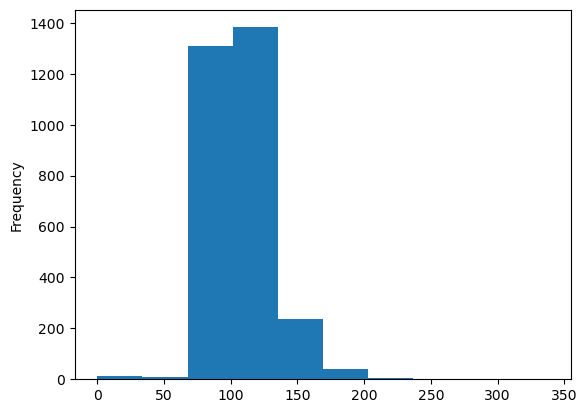

In [75]:
df1.runtime.plot.hist()

> From the above plot there are more outliers so we should consider Median rather than Mean.

In [77]:
df1.runtime.median()

104.0

In [78]:
df1['runtime']=df1['runtime'].fillna(df1.runtime.median())

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   genres                3000 non-null   object        
 1   original_language     3000 non-null   object        
 2   popularity            3000 non-null   float64       
 3   production_companies  3000 non-null   object        
 4   production_countries  3000 non-null   object        
 5   release_date          3000 non-null   datetime64[ns]
 6   runtime               3000 non-null   float64       
 7   released_languages    3000 non-null   object        
 8   status                3000 non-null   object        
 9   title                 3000 non-null   object        
 10  cast                  3000 non-null   object        
 11  budget_Millions       3000 non-null   float64       
 12  revenue_Millions      3000 non-null   float64       
 13  director_name     

In [80]:
df1.to_csv('train_cleaned.csv')

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

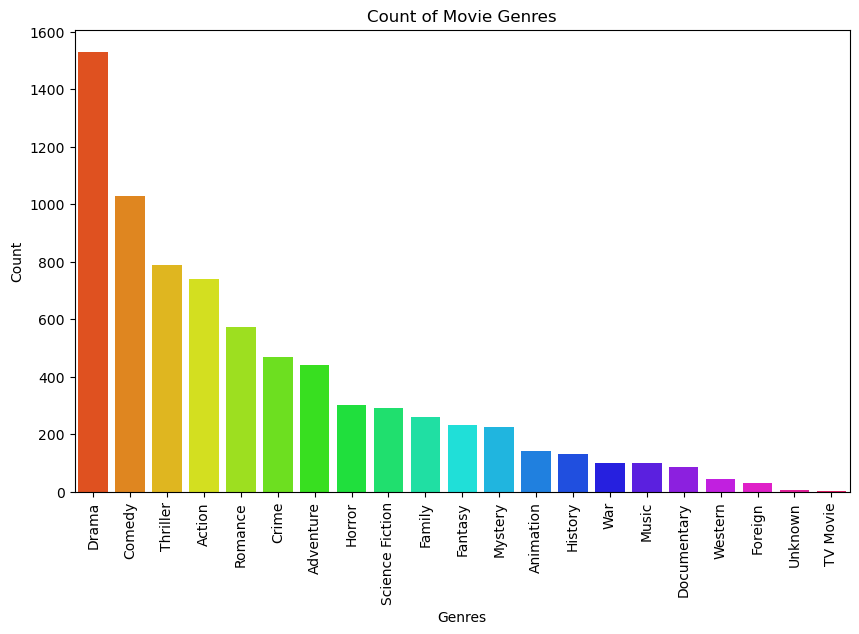

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the 'genres' column
genres = df1.genres.str.split(",")

# Explode the column to have one genre per row and count the occurrences
Mgeners = genres.explode().value_counts()

# Create a custom color palette with more distinct colors
custom_palette = sns.color_palette('hsv', len(Mgeners))

# Create the bar plot using the custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=Mgeners.index, y=Mgeners, palette=custom_palette)

# Set the x-axis label
plt.xlabel('Genres')

# Set the y-axis label
plt.ylabel('Count')

# Set the chart title
plt.title('Count of Movie Genres')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


The bar plot displays the count of movie genres. Among all genres, Drama has the highest count, followed by Comedy and Thriller. 

C:\Users\SAI PRAVEEN YERRA\AppData\Local\Temp\ipykernel_15764\791375501.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df1.groupby(['Year', 'genres']).sum().reset_index()


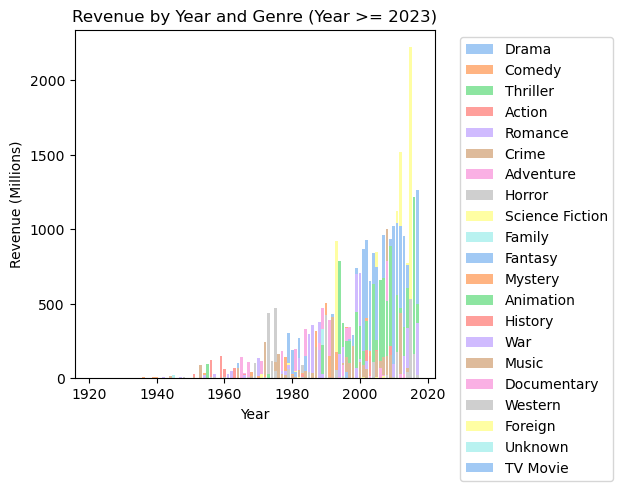

In [51]:
import matplotlib.pyplot as plt

a = df1['genres'].str.split(',')

# Explode genres to have one genre per row and count the occurrences
genre_counts = a.explode().value_counts()

# Group the data by Year and genres and calculate the sum of revenue for each combination
grouped_df = df1.groupby(['Year', 'genres']).sum().reset_index()

# Create a bar plot for each genre
for genre in genre_counts.index:
    genre_df = grouped_df[grouped_df['genres'].apply(lambda x: genre in x)]
    plt.bar(genre_df['Year'], genre_df['revenue_Millions'], label=genre)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue by Year and Genre')

# Add a legend on the right side of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the plot layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()


The above plot shows Revenue with respective to the Genre according to the Year of movie relesed

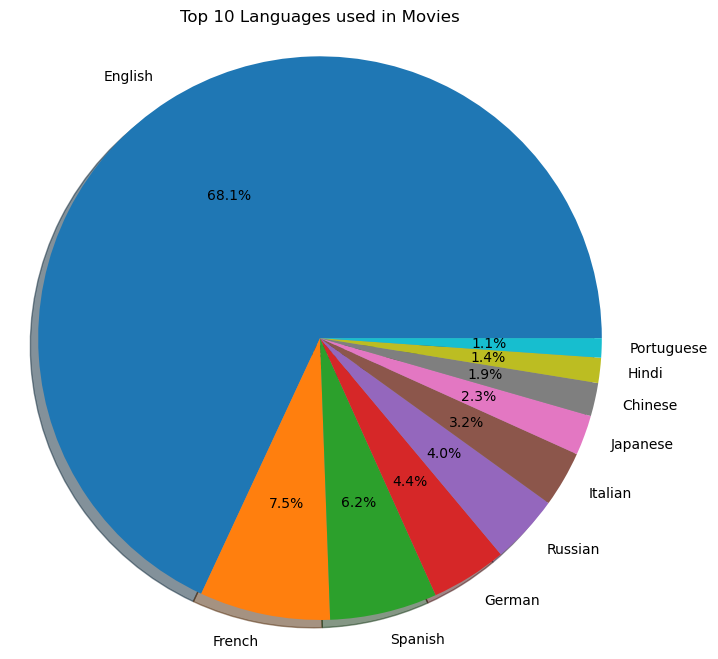

In [35]:
import matplotlib.pyplot as plt

# Split the 'released_languages' column
released_languages = df1.released_languages.str.split(",")

# Explode the column to have one language per row and count the occurrences
language  = released_languages.explode().value_counts()
top_10_genres = language.nlargest(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', shadow=True)
plt.title('Top 10 Languages used in Movies')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()


The pie chart represents the distribution of languages in the top 10 languages spoken in movies, with English occupying the largest share at 68.1%, followed by French at 7.5% and Spanish at 6.2%.

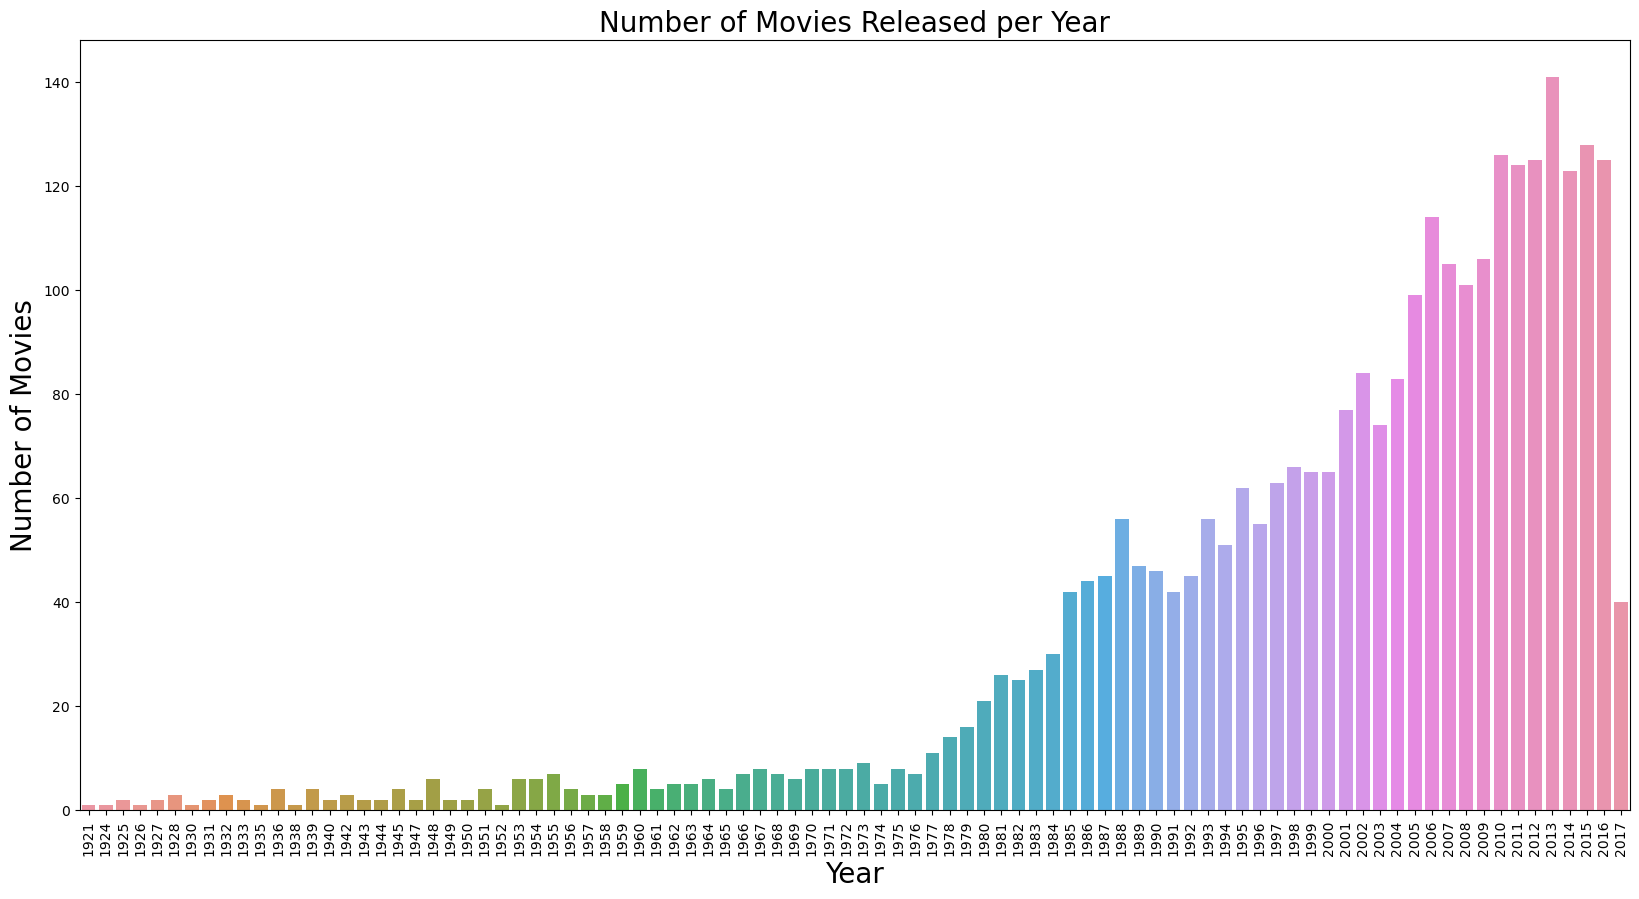

In [88]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(x='Year', data=df1)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Movies',fontsize=20)
plt.title('Number of Movies Released per Year',fontsize=20)
plt.xticks(rotation=90);


The Count Plot shows the number of Movies relesed in a perticular Year and in a Month

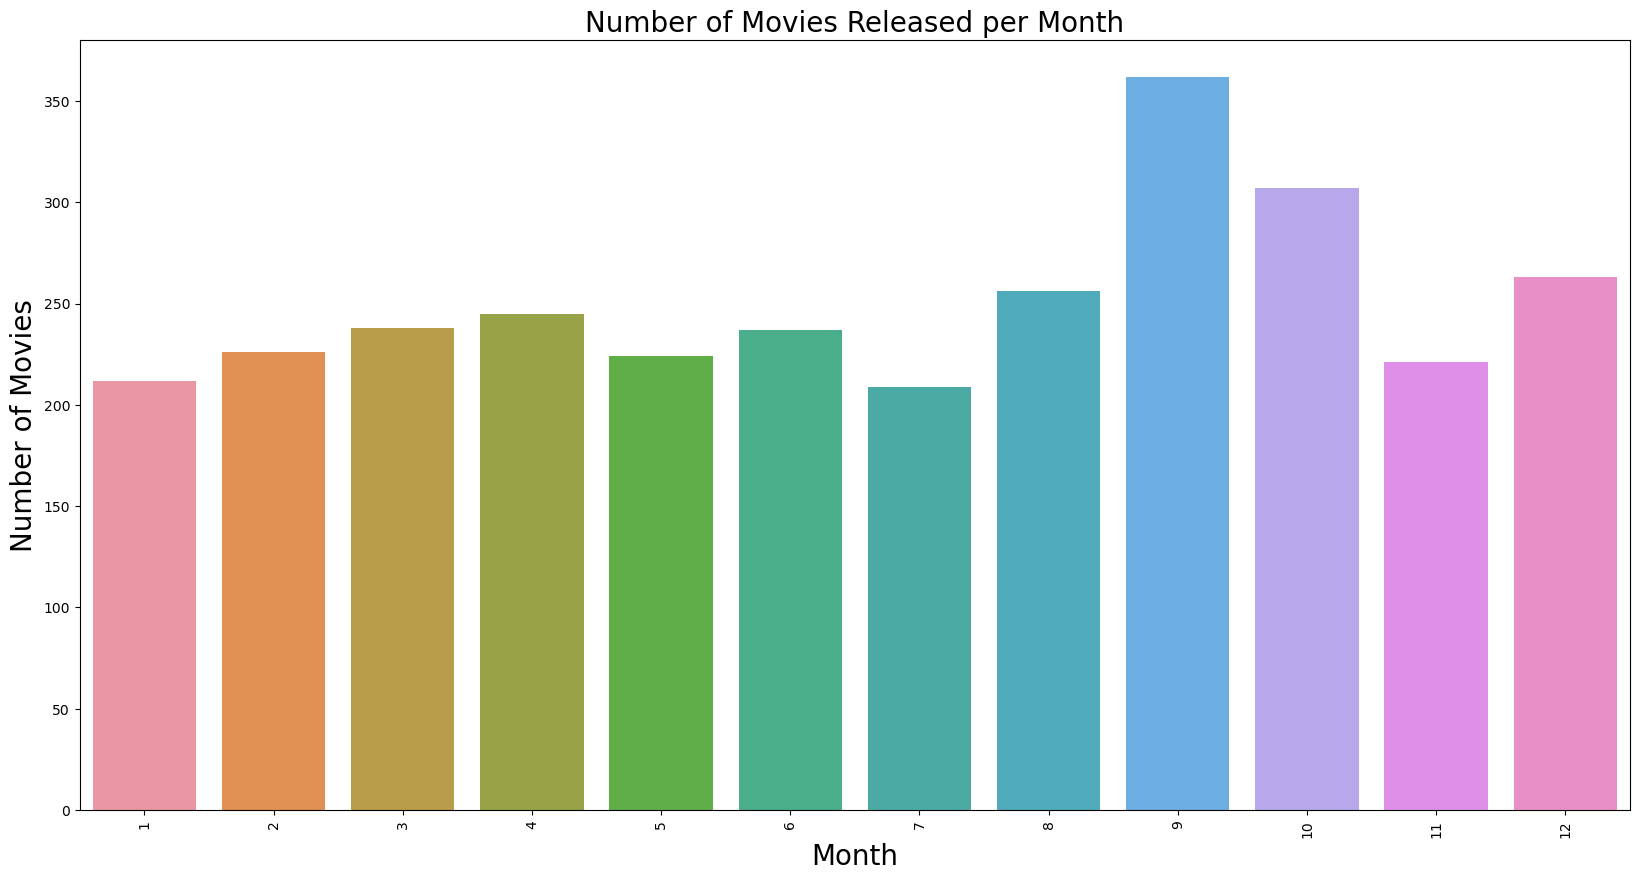

In [89]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(x='Month', data=df1)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Number of Movies',fontsize=20)
plt.title('Number of Movies Released per Month',fontsize=20)
plt.xticks(rotation=90);


In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   genres                3000 non-null   object        
 1   original_language     3000 non-null   object        
 2   popularity            3000 non-null   float64       
 3   production_companies  3000 non-null   object        
 4   production_countries  3000 non-null   object        
 5   release_date          3000 non-null   datetime64[ns]
 6   runtime               3000 non-null   float64       
 7   released_languages    3000 non-null   object        
 8   status                3000 non-null   object        
 9   title                 3000 non-null   object        
 10  cast                  3000 non-null   object        
 11  budget_Millions       3000 non-null   float64       
 12  revenue_Millions      3000 non-null   float64       
 13  director_name     

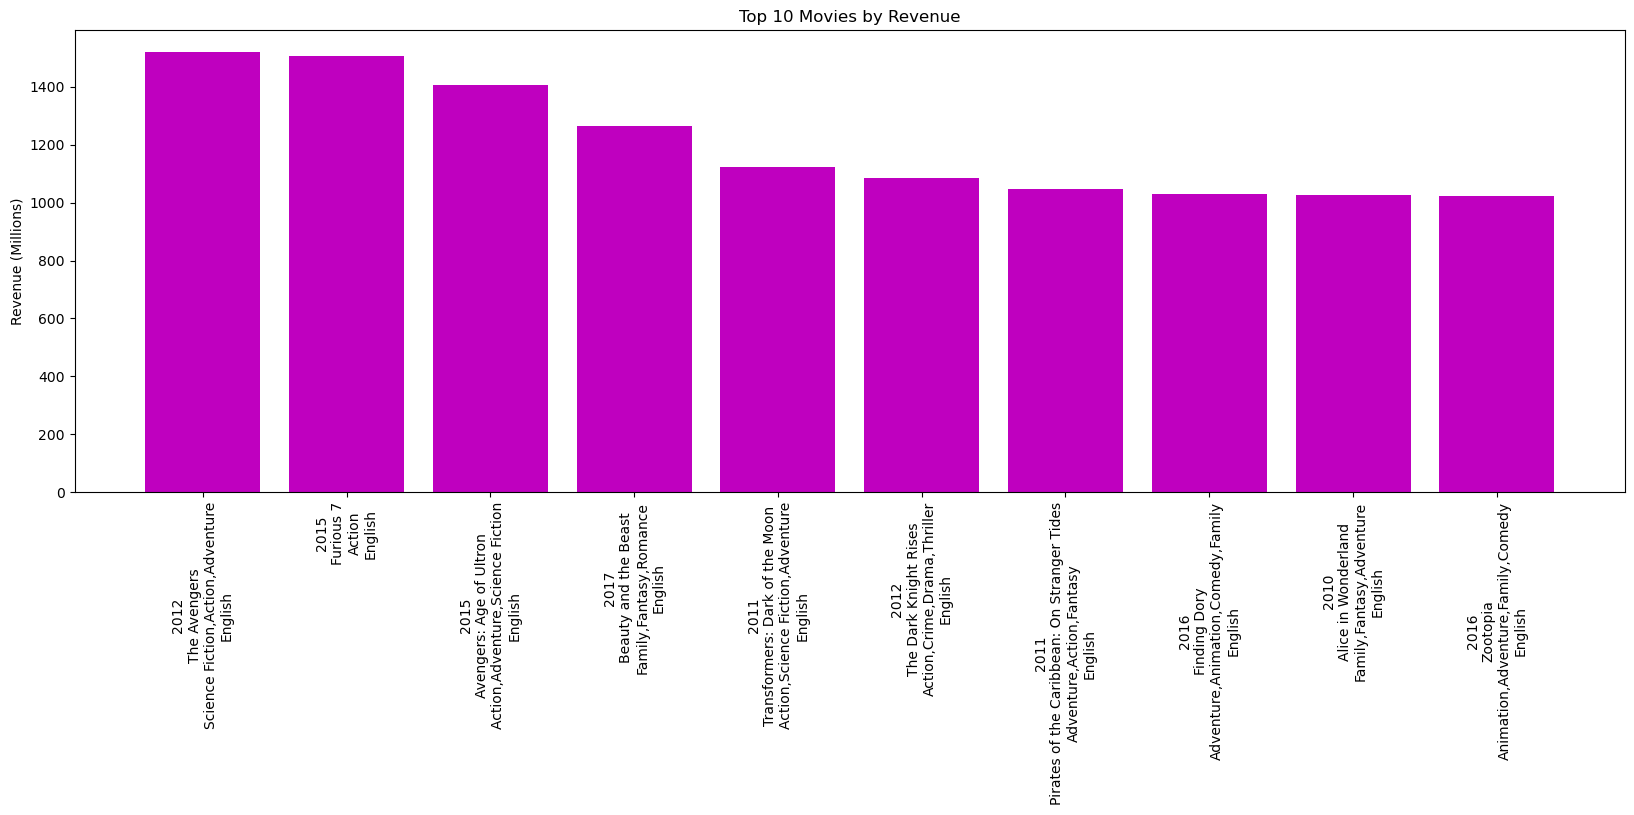

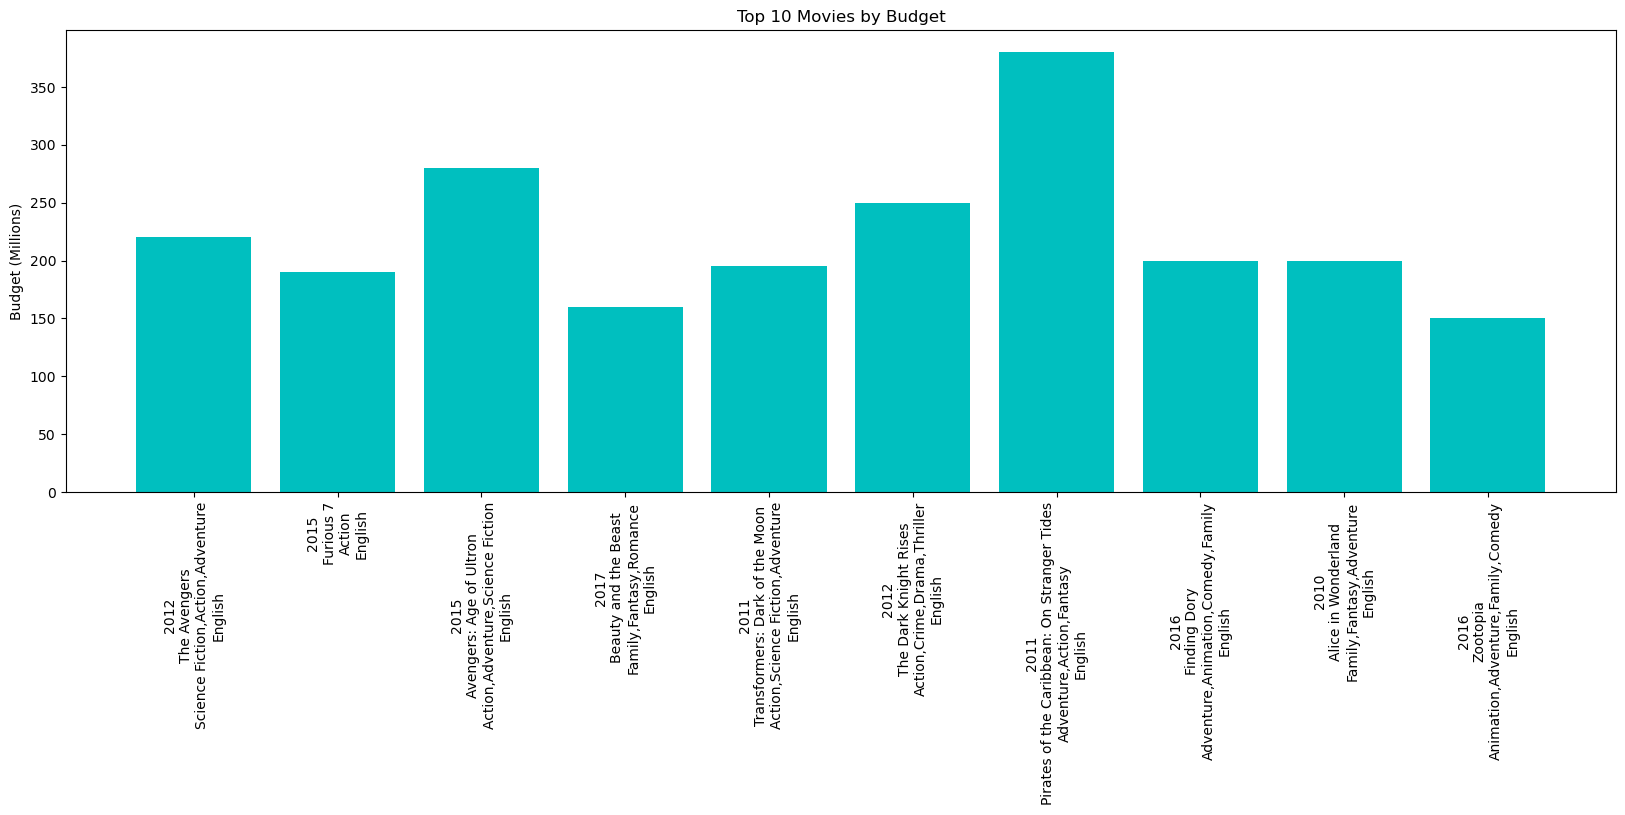

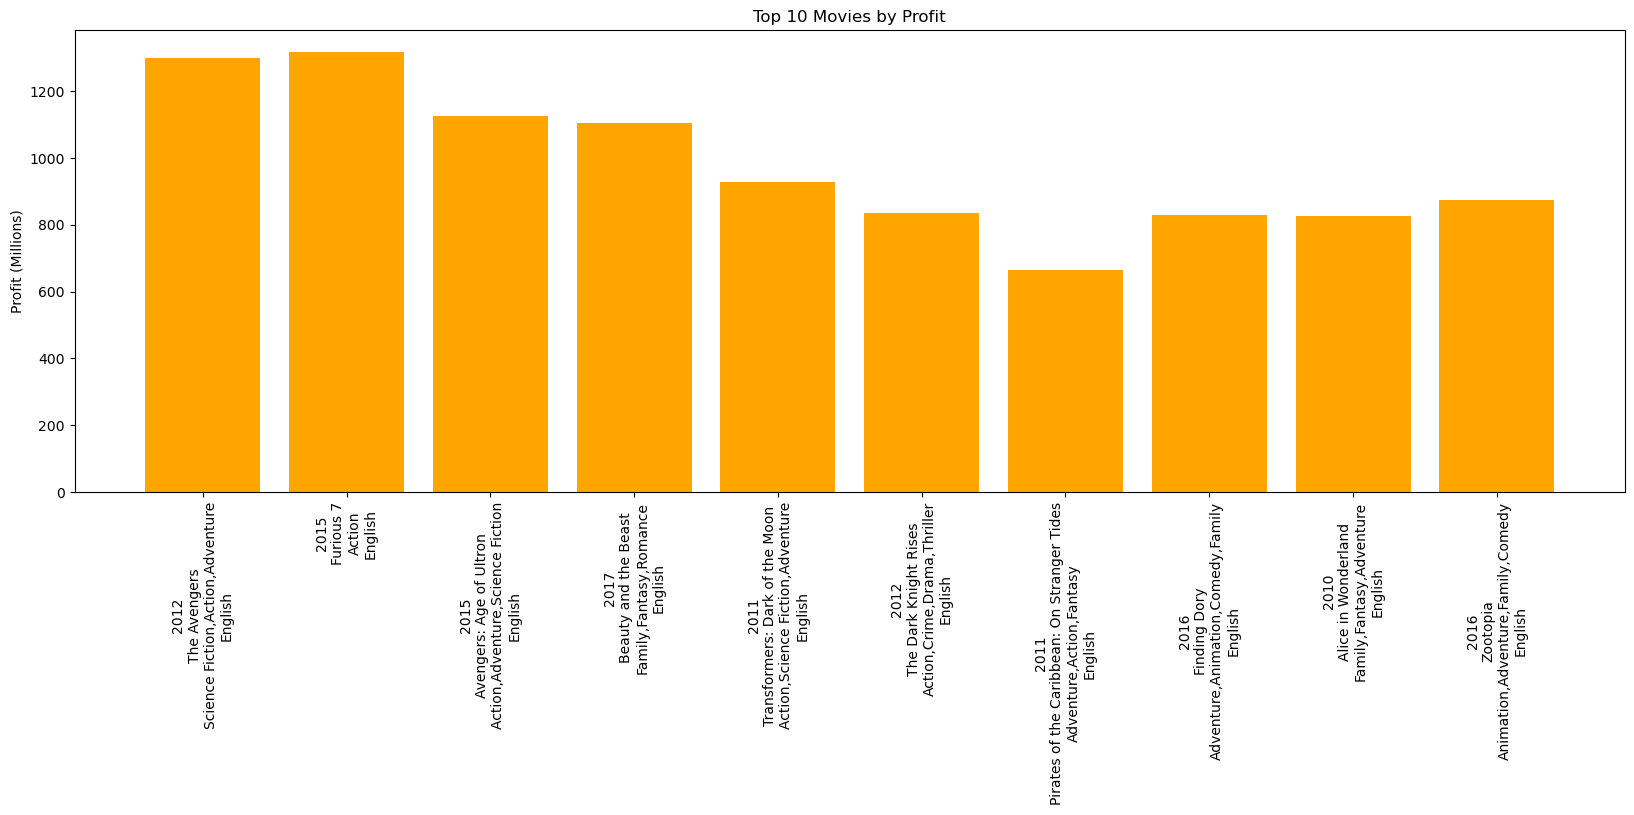

In [24]:
import matplotlib.pyplot as plt

# Sort the DataFrame by revenue
df_sorted = df1.sort_values('revenue_Millions', ascending=False)

# Select the top 10 rows
top_10 = df_sorted.head(10)

# Plotting revenue
fig, ax = plt.subplots(figsize=(20, 6))

# Set the positions of the bars on the x-axis
index = range(len(top_10))

# Plot the bars for revenue
ax.bar(index, top_10['revenue_Millions'], color='m')

# Set the x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(top_10['Year'].astype(str) + '\n' + top_10['title']+ '\n' + top_10['genres']+ '\n' + top_10['original_language'], rotation=90)

# Set the y-axis label
ax.set_ylabel('Revenue (Millions)')

# Set the chart title
ax.set_title('Top 10 Movies by Revenue')

# Show the plot
plt.show()


# Plotting budget
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the bars for budget
ax.bar(index, top_10['budget_Millions'], color='c')

# Set the x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(top_10['Year'].astype(str) + '\n' + top_10['title']+ '\n' + top_10['genres']+ '\n' + top_10['original_language'], rotation=90)

# Set the y-axis label
ax.set_ylabel('Budget (Millions)')

# Set the chart title
ax.set_title('Top 10 Movies by Budget')

# Show the plot
plt.show()


# Plotting profit
fig, ax = plt.subplots(figsize=(20, 6))

# Calculate profit (revenue - budget)
profit = top_10['revenue_Millions'] - top_10['budget_Millions']

# Plot the bars for profit
ax.bar(index, profit, color='orange')

# Set the x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(top_10['Year'].astype(str) + '\n' + top_10['title']+ '\n' + top_10['genres']+ '\n' + top_10['original_language'], rotation=90)


# Set the y-axis label
ax.set_ylabel('Profit (Millions)')

# Set the chart title
ax.set_title('Top 10 Movies by Profit')

# Show the plot
plt.show()


From the first bar plot, it can be observed that the movie "Pirates of the Caribbean: On Stranger Tides" released in 2011, belonging to the genre of action, adventure, and fantasy, has the highest budget among the movies in the dataset, with a budget of 380 million dollars. It is an English language movie.

The second bar plot reveals that the movie "The Avengers" released in 2012, falling under the genres of action, adventure, and science fiction, has the highest revenue among the movies, with a revenue of 1,519.6 million dollars. It is also an English language movie.

In the third bar plot, the movie "Furious 7" released in 2015, categorized as an English language action movie, has the highest profit among the movies, amounting to 1,316 million dollars.

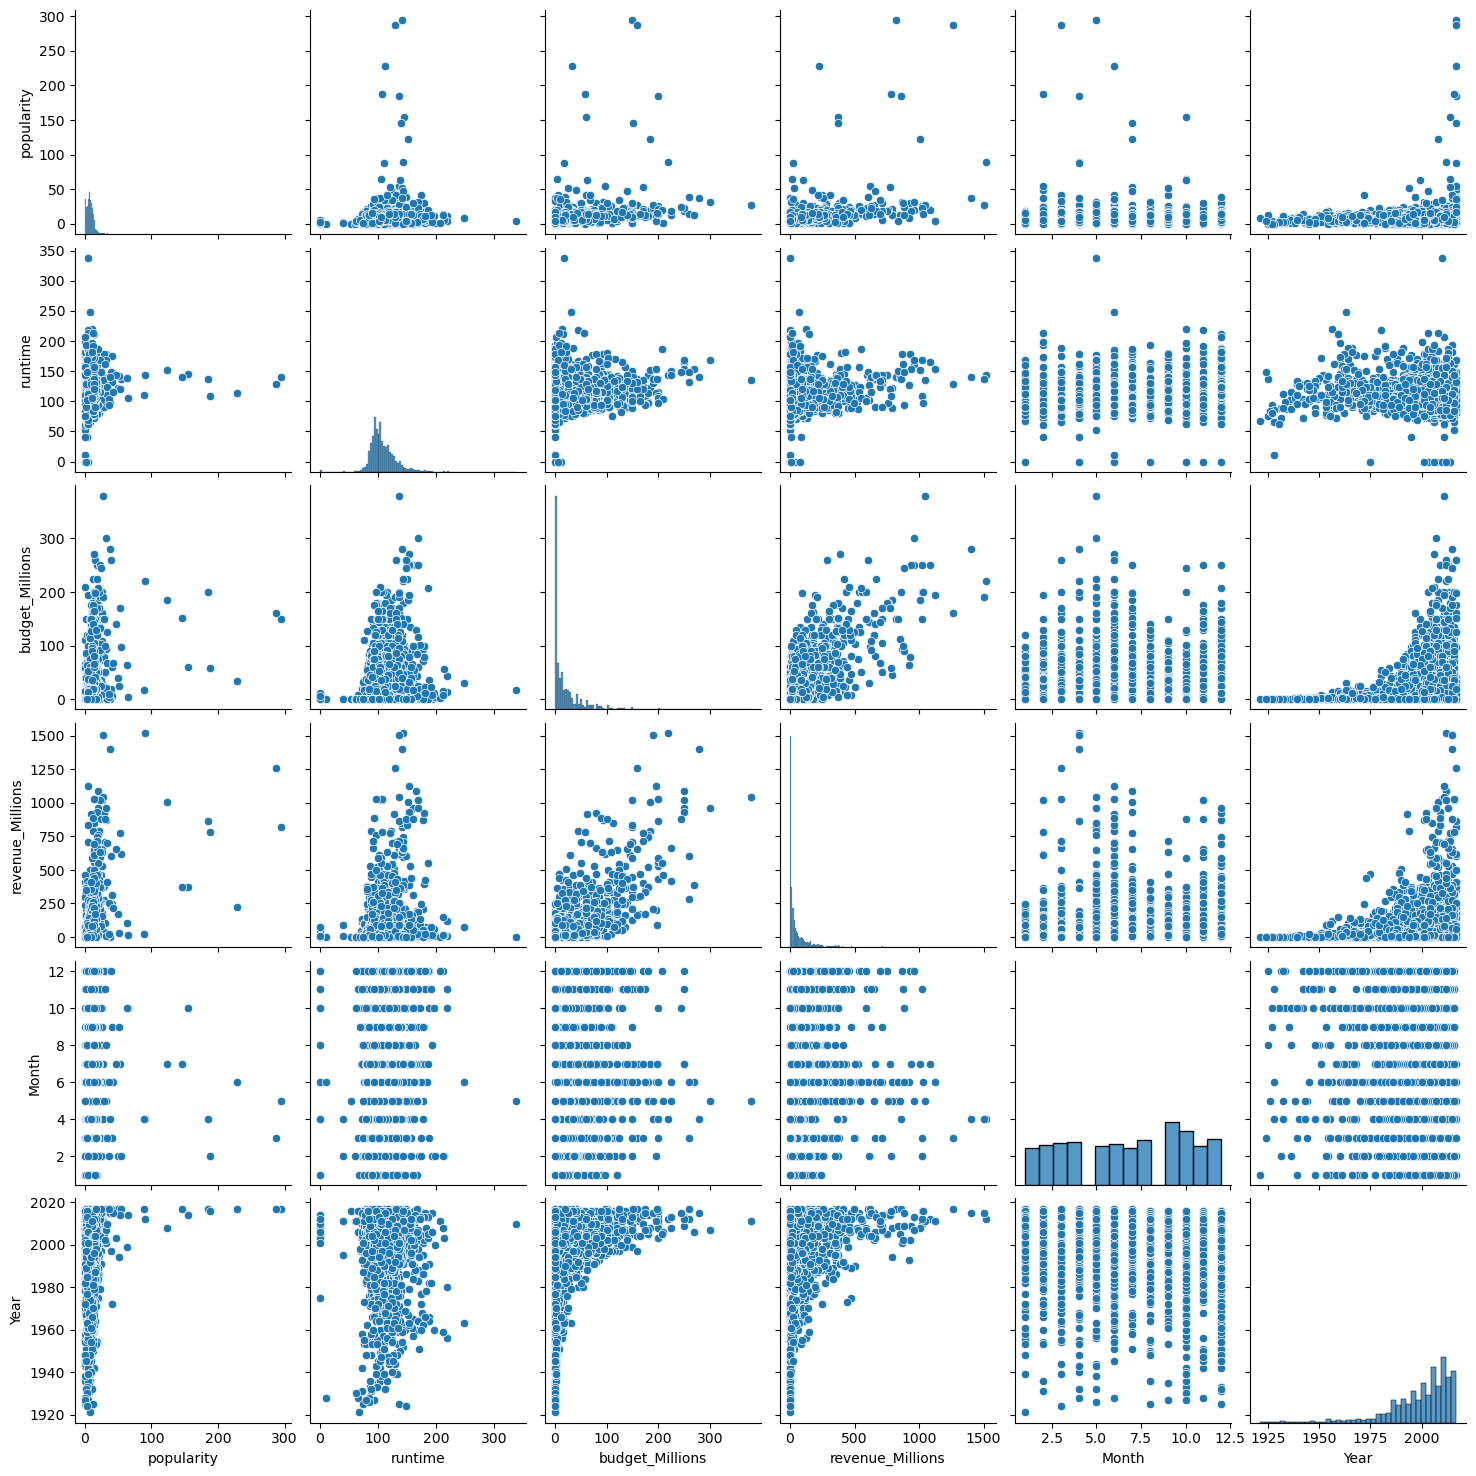

In [93]:
sns.pairplot(df1)

C:\Users\SAI PRAVEEN YERRA\AppData\Local\Temp\ipykernel_25100\1630275665.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),cmap="cool",annot=True,linewidth=0.5,linecolor="white")


<Axes: >

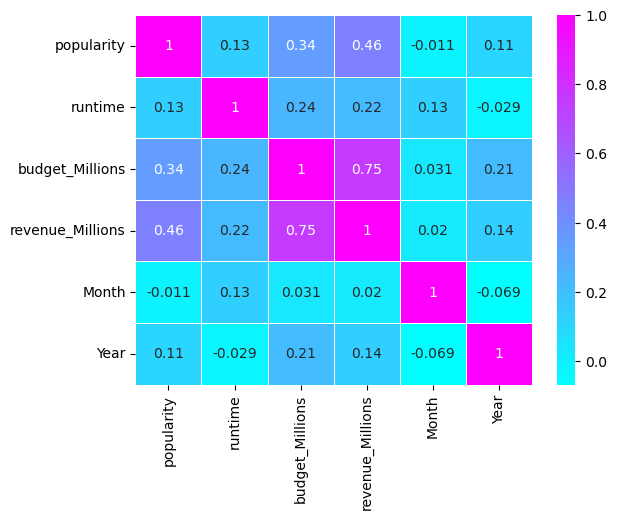

In [83]:
sns.heatmap(df1.corr(),cmap="cool",annot=True,linewidth=0.5,linecolor="white")

From above Pair Plot and Heat Map we can find the corelation and dependency of the Numerical Columns 

In [2]:
import pandas as pd
import numpy as np

In [29]:
df1=pd.read_csv('train_cleaned.csv')

In [30]:
df1.drop(['Unnamed: 0','release_date'],axis=1,inplace=True)

## MODEL BUILDING on Train Data

In [31]:
df1.select_dtypes(include='number').columns

Index(['popularity', 'runtime', 'budget_Millions', 'revenue_Millions', 'Month',
       'Year'],
      dtype='object')

Standardizing the Numerical Column 

In [32]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['popularity','runtime','budget_Millions','Month','Year']
scaler = StandardScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

In [33]:
df1.select_dtypes(include='object').columns

Index(['genres', 'original_language', 'production_companies',
       'production_countries', 'released_languages', 'status', 'title', 'cast',
       'director_name'],
      dtype='object')

Converting the categorical variables into a numerical representation that machine learning algorithms can process

In [34]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['genres', 'original_language', 'production_companies',
                       'production_countries', 'released_languages', 'status', 
                       'title', 'cast','director_name']

label_encoder = LabelEncoder()
df1[categorical_columns] = df1[categorical_columns].apply(label_encoder.fit_transform)

In [35]:
df1.head()

,genres,original_language,popularity,production_companies,production_countries,runtime,released_languages,status,title,cast,budget_Millions,revenue_Millions,director_name,Month,Year
0,318,6,-0.155998,1446,284,-0.672869,74,0,1045,2382,-0.230453,12.314651,1671,-1.400988,0.991327
1,343,6,-0.017714,2227,284,0.233108,74,0,2546,151,0.471872,95.149435,551,0.359293,0.278002
2,458,6,4.613849,213,284,-0.129283,74,0,2903,2050,-0.519486,13.092000,345,0.946053,0.926479
3,823,12,-0.436981,2175,163,0.640798,150,0,1183,2853,-0.576212,16.000000,1698,-1.107608,0.796784
4,161,17,-0.604463,2175,237,0.459602,342,0,1371,1649,-0.608627,3.923970,932,-1.400988,0.602241


Spliting the data into train and test

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, Y_train, Y_test= train_test_split(df1.drop('revenue_Millions', axis=1),
                                                   df1['revenue_Millions'], test_size=0.30,random_state=65)

Using different Machine Learning Regression Algorithms we should find the best Algorithm where the model was well trained by evaluateing with the help of Metrics

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_regression_model(model, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('Root Mean Squared Error:', rmse)

In [63]:
evaluate_regression_model(LinearRegression(), X_test, Y_test)

Mean Squared Error: 5755.840923317673
Mean Absolute Error: 43.97489480202335
Root Mean Squared Error: 75.86725857257314


In [64]:
evaluate_regression_model(DecisionTreeRegressor(), X_test, Y_test)

Mean Squared Error: 11736.157752530704
Mean Absolute Error: 53.60119765555556
Root Mean Squared Error: 108.33354860120988


In [54]:
evaluate_regression_model(RandomForestRegressor(), X_test, Y_test)

Mean Squared Error: 6285.290639036712
Mean Absolute Error: 40.83791960868889
Root Mean Squared Error: 79.27982491805031


In [66]:
evaluate_regression_model(SVR(), X_test, Y_test)

Mean Squared Error: 18408.58482624107
Mean Absolute Error: 60.067263611669944
Root Mean Squared Error: 135.67824006170287


The RandomForest algorithm showed lower regression metrics compared to others, indicating better performance in training the model. Since Logistic Regression cannot be tuned, hyperparameter tuning should be performed on RandomForest to further improve its performance. Therefore, focusing on RandomForest for the model development would be recommended.

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, Y_train)
 
# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_train_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_train_pred)
mae = mean_absolute_error(Y_test, y_train_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Get the best hyperparameters found during GridSearchCV
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)


Mean Squared Error: 6440.659747351429
Mean Absolute Error: 40.817636771827914
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a RandomForest regression model
model = RandomForestRegressor()

# Define the number of folds for cross-validation
num_folds = 5

# Create a KFold object with the desired number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of the cross-validation scores
mean_score = scores.mean()
print("Mean Score:", mean_score)


Cross-Validation Scores: [0.74616693 0.62725006 0.68200822 0.5232956  0.58530126]
Mean Score: 0.6328044157321613


Observations:

The Random Forest Regressor algorithm performed well in both the 3-way splitting and 5-fold cross-validation. It achieved a relatively low Mean Absolute Error (MAE), indicating good accuracy in predicting the target variable. The Root Mean Squared Error (RMSE) and R-squared (R2) score further support the model's performance.

In the 5-fold cross-validation, hyperparameter tuning was performed, and the best combination of hyperparameters for the Random Forest Regressor was found to be {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}. This resulted in an improved MAE of 40.81, indicating better predictive performance.

Conclusion:

Based on the evaluation results, the Random Forest Regressor algorithm demonstrates strong performance in predicting the target variable. With the optimized hyperparameters, it achieves a lower MAE, indicating improved accuracy compared to the default model. Therefore, the Random Forest Regressor with the identified hyperparameters can be considered as the preferred model for this dataset.

## Test Data Text Cleaning Process

In [1]:
import numpy as np
import pandas as pd

In [2]:
df2=pd.read_csv(r"C:\Users\SAI PRAVEEN YERRA\Downloads\Machine Learning\ML Project 2\test.csv")

In [3]:
df2.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [4]:
df2['original_language'].unique()

array(['ja', 'en', 'fr', 'de', 'he', 'hi', 'ru', 'ka', 'zh', 'th', 'it',
       'es', 'bn', 'sv', 'ko', 'sr', 'da', 'ta', 'cs', 'cn', 'ro', 'ca',
       'no', 'nl', 'te', 'tr', 'bm', 'ml', 'pt', 'af', 'fi', 'ur', 'el',
       'id', 'xx', 'pl', 'kn', 'is', 'hu'], dtype=object)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [6]:
df2["budget_Millions"]=df2["budget"].apply(lambda x : x/1000000 if x>0 else x)
df2['genres'] = df2['genres'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)
df2['production_companies'] = df2['production_companies'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)
df2['production_countries'] = df2['production_countries'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)
df2['Keywords'] = df2['Keywords'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)

In [7]:
iso_dict = {
    'aa': 'Afar', 'ab': 'Abkhazian', 'ae': 'Avestan', 'af': 'Afrikaans', 'ak': 'Akan', 'am': 'Amharic', 'an': 'Aragonese',
    'ar': 'Arabic', 'as': 'Assamese', 'av': 'Avaric', 'ay': 'Aymara', 'az': 'Azerbaijani', 'ba': 'Bashkir', 'be': 'Belarusian',
    'bg': 'Bulgarian', 'bh': 'Bihari languages', 'bi': 'Bislama', 'bm': 'Bambara', 'bn': 'Bengali', 'bo': 'Tibetan',
    'br': 'Breton', 'bs': 'Bosnian', 'ca': 'Catalan', 'ce': 'Chechen', 'ch': 'Chamorro', 'co': 'Corsican', 'cr': 'Cree',
    'cs': 'Czech','cn': 'Chinese','cu': 'Church Slavic', 'cv': 'Chuvash', 'cy': 'Welsh', 'da': 'Danish', 'de': 'German', 'dv': 'Divehi',
    'dz': 'Dzongkha', 'ee': 'Ewe', 'el': 'Greek', 'en': 'English', 'eo': 'Esperanto', 'es': 'Spanish', 'et': 'Estonian',
    'eu': 'Basque', 'fa': 'Persian', 'ff': 'Fulah', 'fi': 'Finnish', 'fj': 'Fijian', 'fo': 'Faroese', 'fr': 'French',
    'fy': 'Western Frisian', 'ga': 'Irish', 'gd': 'Scottish Gaelic', 'gl': 'Galician', 'gn': 'Guarani', 'gu': 'Gujarati',
    'gv': 'Manx', 'ha': 'Hausa', 'he': 'Hebrew', 'hi': 'Hindi', 'ho': 'Hiri Motu', 'hr': 'Croatian', 'ht': 'Haitian',
    'hu': 'Hungarian', 'hy': 'Armenian', 'hz': 'Herero', 'ia': 'Interlingua', 'id': 'Indonesian', 'ie': 'Interlingue',
    'ig': 'Igbo', 'ii': 'Sichuan Yi', 'ik': 'Inupiaq', 'io': 'Ido', 'is': 'Icelandic', 'it': 'Italian', 'iu': 'Inuktitut',
    'ja': 'Japanese', 'jv': 'Javanese', 'ka': 'Georgian', 'kg': 'Kongo', 'ki': 'Kikuyu', 'kj': 'Kwanyama', 'kk': 'Kazakh',
    'kl': 'Kalaallisut', 'km': 'Central Khmer', 'kn': 'Kannada', 'ko': 'Korean', 'kr': 'Kanuri', 'ks': 'Kashmiri',
    'ku': 'Kurdish', 'kv': 'Komi', 'kw': 'Cornish', 'ky': 'Kirghiz', 'la': 'Latin', 'lb': 'Luxembourgish', 'lg': 'Ganda',
    'li': 'Limburgan', 'ln': 'Lingala', 'lo': 'Lao', 'lt': 'Lithuanian', 'lu': 'Luba-Katanga', 'lv': 'Latvian', 'mg': 'Malagasy',
    'mh': 'Marshallese', 'mi': 'Maori', 'mk': 'Macedonian', 'ml': 'Malayalam', 'mn': 'Mongolian', 'mr': 'Marathi', 'ms': 'Malay',
    'mt': 'Maltese', 'my': 'Burmese', 'na': 'Nauru', 'nb': 'Norwegian Bokmål', 'nd': 'North Ndebele', 'ne': 'Nepali', 'ng': 'Ndonga',
    'nl': 'Dutch', 'nn': 'Norwegian Nynorsk', 'no': 'Norwegian', 'nr': 'South Ndebele', 'nv': 'Navajo', 'ny': 'Chichewa',
    'oc': 'Occitan', 'oj': 'Ojibwa', 'om': 'Oromo', 'or': 'Oriya', 'os': 'Ossetian', 'pa': 'Panjabi', 'pi': 'Pali', 'pl': 'Polish',
    'ps': 'Pushto', 'pt': 'Portuguese', 'qu': 'Quechua', 'rm': 'Romansh', 'rn': 'Rundi', 'ro': 'Romanian', 'ru': 'Russian',
    'rw': 'Kinyarwanda', 'sa': 'Sanskrit', 'sc': 'Sardinian', 'sd': 'Sindhi', 'se': 'Northern Sami', 'sg': 'Sango', 'si': 'Sinhala',
    'sk': 'Slovak', 'sl': 'Slovenian', 'sm': 'Samoan', 'sn': 'Shona', 'so': 'Somali', 'sq': 'Albanian', 'sr': 'Serbian', 'ss': 'Swati',
    'st': 'Southern Sotho', 'su': 'Sundanese', 'sv': 'Swedish', 'sw': 'Swahili', 'ta': 'Tamil', 'te': 'Telugu', 'tg': 'Tajik',
    'th': 'Thai', 'ti': 'Tigrinya', 'tk': 'Turkmen', 'tl': 'Tagalog', 'tn': 'Tswana', 'to': 'Tonga (Tonga Islands)', 'tr': 'Turkish',
    'ts': 'Tsonga', 'tt': 'Tatar', 'tw': 'Twi', 'ty': 'Tahitian', 'ug': 'Uighur', 'uk': 'Ukrainian', 'ur': 'Urdu',
    'uz': 'Uzbek', 've': 'Venda', 'vi': 'Vietnamese', 'vo': 'Volapük', 'wa': 'Walloon', 'wo': 'Wolof','xx':'Unknown','xh': 'Xhosa',
    'yi': 'Yiddish', 'yo': 'Yoruba', 'za': 'Zhuang', 'zh': 'Chinese','zh': 'Chinese', 'zu': 'Zulu'}

# Function to map ISO codes to language names
def get_language_names(codes):
    return ','.join([iso_dict.get(code,'') for code in codes])

def map_language_names(row):
    spoken_languages = row['spoken_languages']
    if isinstance(spoken_languages, str):
        iso_codes = [spoke['iso_639_1'] for spoke in eval(spoken_languages)]
        language_names = get_language_names(iso_codes)
        return language_names
    return ''

df2['spoken_languages'] = df2.apply(map_language_names, axis=1)

In [8]:
df2['original_language'] = df2['original_language'].map(iso_dict)

In [9]:
import ast
df2['director_name'] = df2['crew'].apply(lambda x: [entry['name'] for entry in ast.literal_eval(x) 
                                                    if entry.get('job') == 'Director'] if pd.notnull(x) else np.nan)

In [10]:
df2['crew'] = df2['crew'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)
df2['cast'] = df2['cast'].apply(lambda x: [item['name'] for item in eval(x)] if isinstance (x,str) else np.nan)


In [11]:
from datetime import datetime
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['Month'] = df2['release_date'].dt.month
df2['Year'] = df2['release_date'].dt.year

In [12]:
df2.Month.isna().value_counts()

False    4397
True        1
Name: Month, dtype: int64

In [13]:
df2['Month'] = df2['Month'].fillna(df2['Month'].mode().iloc[0])
df2['Year']=df2['Year'].fillna(df2['Year'].mode().iloc[0])

In [14]:
df2.Month.isna().value_counts()

False    4398
Name: Month, dtype: int64

In [15]:
df2 = df2.apply(lambda x: [','.join(item) if isinstance(item, list) else item for item in x])
df2 = df2.rename(columns={'spoken_languages':'released_languages'})
df2['released_languages']=np.where(df2['released_languages']=="",df2['original_language'],df2['released_languages'])


In [16]:
df2[['genres', 'production_companies', 'production_countries', 'cast', 'director_name','status']] = df2[['genres', 'production_companies', 'production_countries', 'cast', 'director_name','status']].fillna('Unknown')

In [17]:
df2['runtime']=df2['runtime'].fillna(df2.runtime.median())

In [18]:
df2[df2['title'].isnull()]['original_title']

2398                  グスコーブドリの伝記
2425    La Vérité si je Mens ! 3
3628                    Barefoot
Name: original_title, dtype: object

In [19]:
df2['title']=np.where(df2['title'].isnull(),df2['original_title'],df2['title'])


In [20]:
df2.drop(columns=['budget','belongs_to_collection','homepage','poster_path','tagline','overview','imdb_id','original_title','id','Keywords','crew','release_date'],axis=1,inplace=True)

In [21]:
df2.to_csv('test_cleaned.csv')

In [22]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['popularity','runtime','budget_Millions','Month','Year']
scaler = StandardScaler()
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

In [23]:
df2.head()

,genres,original_language,popularity,production_companies,production_countries,runtime,released_languages,status,title,cast,budget_Millions,director_name,Month,Year
0,"Adventure,Animation,Family,Fantasy",Japanese,-0.384898,Unknown,"Japan,United States of America",-0.837138,"English,Japanese",Released,Pokémon: The Rise of Darkrai,"Craig Blair,Emily Bauer,Sarah Natochenny,Ikue ...",-0.613873,Kunihiko Yuyama,0.032794,0.090615
1,"Horror,Science Fiction",English,-0.408797,Woolner Brothers Pictures Inc.,United States of America,-2.024979,English,Released,Attack of the 50 Foot Woman,"Allison Hayes,William Hudson,Yvette Vickers,Ro...",-0.611488,Nathan H. Juran,-0.560745,3.124175
2,"Comedy,Romance",English,-0.038094,"Warner Bros.,Outlaw Productions (I),Miramax",United States of America,-0.362002,English,Released,Addicted to Love,"Meg Ryan,Matthew Broderick,Kelly Preston,Tch√©...",-0.613873,Griffin Dunne,-0.560745,-0.504200
3,"Drama,War,Mystery",French,0.003750,"TS Productions,Micro scope,Phi Group","Canada,France",1.063406,"French,Arabic,English",Released,Incendies,"Lubna Azabal,M√©lissa D√©sormeaux-Poulin,Maxim...",-0.429570,Denis Villeneuve,0.626334,0.269060
4,"History,Documentary",English,-0.436821,Unknown,United States of America,-0.742111,English,Released,Inside Deep Throat,"Dennis Hopper,Peter Bart,Warren Beatty,Carl Be...",-0.559666,"Fenton Bailey,Randy Barbato",-1.451054,-0.028348


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['genres', 'original_language', 'production_companies', 'production_countries',
                       'released_languages', 'status', 'title', 'cast', 'director_name']

label_encoder = LabelEncoder()
df2[categorical_columns] = df2[categorical_columns].apply(label_encoder.fit_transform)


In [26]:
df2

,genres,original_language,popularity,production_companies,production_countries,runtime,released_languages,status,title,cast,budget_Millions,director_name,Month,Year
0,249,20,-0.384898,3088,283,-0.837138,254,1,2525,889,-0.613873,1355,0.032794,0.090615
1,873,8,-0.408797,3320,419,-2.024979,99,1,317,149,-0.611488,1684,-0.560745,3.124175
2,482,8,-0.038094,3266,419,-0.362002,99,1,164,2791,-0.613873,825,-0.560745,-0.504200
3,729,10,0.003750,2537,67,1.063406,332,1,1667,2601,-0.429570,564,0.626334,0.269060
4,842,8,-0.436821,3088,419,-0.742111,99,1,1679,1029,-0.559666,693,-1.451054,-0.028348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,1018,8,0.116331,1248,195,0.493243,195,1,2411,218,0.524470,1589,0.329564,-0.266274
4394,23,8,-0.205094,1909,419,-0.599570,99,1,4274,3745,-0.098908,2226,0.329564,-0.087829
4395,566,8,0.085738,2717,419,1.015892,99,1,3891,3190,-0.180219,2155,1.516643,-1.396424
4396,878,8,0.967355,1784,419,-0.362002,99,1,1714,2640,-0.559666,532,-1.451054,0.566468


## Evaluation on Test Data using Optimized Random Forest Regressor:

In [39]:
#Define the best hyperparameters obtained from GridSearchCV
from sklearn.ensemble import RandomForestRegressor
best_params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10}

#Train the model with the best hyperparameters on the full training dataset
model = RandomForestRegressor(**best_params)
model.fit(X_train, Y_train)

# Use the trained model to predict the target variable for the test dataset
y_test_pred = model.predict(df2)

In [40]:
Predicted_Revenue=pd.read_csv(r'test_cleaned.csv')

In [41]:
Predicted_Revenue = Predicted_Revenue.drop("Unnamed: 0", axis=1)

In [42]:
Predicted_Revenue.head()

,genres,original_language,popularity,production_companies,production_countries,runtime,released_languages,status,title,cast,budget_Millions,director_name,Month,Year
0,"Adventure,Animation,Family,Fantasy",Japanese,3.851534,Unknown,"Japan,United States of America",90.0,"English,Japanese",Released,Pokémon: The Rise of Darkrai,"Craig Blair,Emily Bauer,Sarah Natochenny,Ikue ...",0.000,Kunihiko Yuyama,7.0,2007.0
1,"Horror,Science Fiction",English,3.559789,Woolner Brothers Pictures Inc.,United States of America,65.0,English,Released,Attack of the 50 Foot Woman,"Allison Hayes,William Hudson,Yvette Vickers,Ro...",0.088,Nathan H. Juran,5.0,2058.0
2,"Comedy,Romance",English,8.085194,"Warner Bros.,Outlaw Productions (I),Miramax",United States of America,100.0,English,Released,Addicted to Love,"Meg Ryan,Matthew Broderick,Kelly Preston,Tch√©...",0.000,Griffin Dunne,5.0,1997.0
3,"Drama,War,Mystery",French,8.596012,"TS Productions,Micro scope,Phi Group","Canada,France",130.0,"French,Arabic,English",Released,Incendies,"Lubna Azabal,M√©lissa D√©sormeaux-Poulin,Maxim...",6.800,Denis Villeneuve,9.0,2010.0
4,"History,Documentary",English,3.217680,Unknown,United States of America,92.0,English,Released,Inside Deep Throat,"Dennis Hopper,Peter Bart,Warren Beatty,Carl Be...",2.000,"Fenton Bailey,Randy Barbato",2.0,2005.0


In [188]:
Predicted_Revenue['Predicted revenue_Millions'] = y_test_pred

In [189]:
Predicted_Revenue.head()

,genres,original_language,popularity,production_companies,production_countries,runtime,released_languages,status,title,cast,budget_Millions,director_name,Month,Year,Predicted revenue_Millions
0,"Adventure,Animation,Family,Fantasy",Japanese,3.851534,Unknown,"Japan,United States of America",90.0,"English,Japanese",Released,Pokémon: The Rise of Darkrai,"Craig Blair,Emily Bauer,Sarah Natochenny,Ikue ...",0.000,Kunihiko Yuyama,7.0,2007.0,7.774939
1,"Horror,Science Fiction",English,3.559789,Woolner Brothers Pictures Inc.,United States of America,65.0,English,Released,Attack of the 50 Foot Woman,"Allison Hayes,William Hudson,Yvette Vickers,Ro...",0.088,Nathan H. Juran,5.0,2058.0,7.277635
2,"Comedy,Romance",English,8.085194,"Warner Bros.,Outlaw Productions (I),Miramax",United States of America,100.0,English,Released,Addicted to Love,"Meg Ryan,Matthew Broderick,Kelly Preston,Tch√©...",0.000,Griffin Dunne,5.0,1997.0,28.755323
3,"Drama,War,Mystery",French,8.596012,"TS Productions,Micro scope,Phi Group","Canada,France",130.0,"French,Arabic,English",Released,Incendies,"Lubna Azabal,M√©lissa D√©sormeaux-Poulin,Maxim...",6.800,Denis Villeneuve,9.0,2010.0,44.452690
4,"History,Documentary",English,3.217680,Unknown,United States of America,92.0,English,Released,Inside Deep Throat,"Dennis Hopper,Peter Bart,Warren Beatty,Carl Be...",2.000,"Fenton Bailey,Randy Barbato",2.0,2005.0,7.161464
